In [27]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image#display any png or jpg image

In [28]:
#!pip install git+https://github.com/nlhepler/pydot.git
plot_model = tf.keras.utils.plot_model #display the keras model architecture

In [29]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [30]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_val, y_val) = mnist.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0


(28, 28)


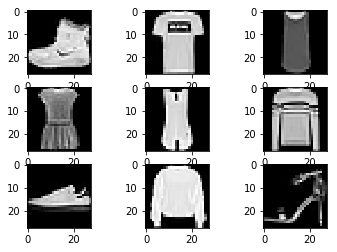

In [31]:
# plot first few images
for i in range(9): 
    # define subplot 
    plt.subplot(330 + 1 + i) #pt.subplot(312)
    # plot raw pixel data 
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray')) 
    #plt.imshow(x_train[i])
# show the figure
print(x_train[i].shape)
plt.show()

## 3 ways to create a Keras model with TensorFlow 2.0 (Sequential, Functional, and Model subclassing)

## Sequential Model API

A sequential model, as the name suggests, allows you to create models layer-by-layer in a step-by-step fashion.

Keras Sequential API is by far the easiest way to get up and running with Keras, but it’s also the most limited — you cannot create models that:

Share layers
Have branches (at least not easily)
Have multiple inputs
Have multiple outputs
Examples of seminal sequential architectures that you may have already used or implemented include:

LeNet
AlexNet
VGGNet

In [32]:
Image(url="https://zitaoshen.rbind.io/project/machine_learning/how-to-build-your-own-neural-net-from-the-scrach/featured.png")

In [33]:
Image(url="https://assets.digitalocean.com/articles/handwriting_tensorflow_python3/cnwitLM.png")

In [34]:
tf.keras.backend.clear_session() #clears the memory while generting models in a loop

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary() #provide model summary

#or model. add
tf.keras.backend.clear_session()
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation("softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flat

In [35]:
plot_model(model, show_shapes=True)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [55]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=64, validation_data=(x_val, y_val))
result = model.evaluate(x_val, y_val)

Epoch 1/4
938/938 [==============================] - 11s 11ms/step - loss: 0.4361 - accuracy: 0.8503 - val_loss: 0.4684 - val_accuracy: 0.8427
Epoch 2/4
938/938 [==============================] - 10s 11ms/step - loss: 0.3946 - accuracy: 0.8605 - val_loss: 0.4391 - val_accuracy: 0.8519
Epoch 3/4
938/938 [==============================] - 10s 11ms/step - loss: 0.3917 - accuracy: 0.8603 - val_loss: 0.4551 - val_accuracy: 0.8442
Epoch 4/4
313/313 [==============================] - 1s 5ms/step - loss: 0.4239 - accuracy: 0.8580


In [11]:
import graphviz

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


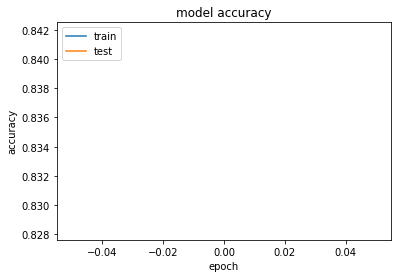

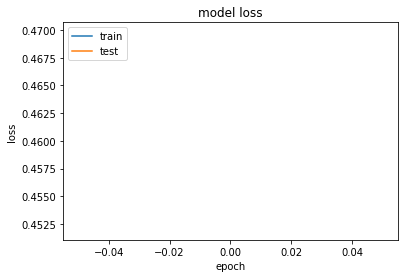

In [54]:
plot_history(history)

## Funtional Model API

Using the Functional API you can:

Create more complex models.
Have multiple inputs and multiple outputs.
Easily define branches in your architectures (ex., an Inception block, ResNet block, etc.).
Design directed acyclic graphs (DAGs).
Easily share layers inside the architecture.

Furthermore, any Sequential model can be implemented using Keras’ Functional API.

Examples of models that have Functional characteristics (such as layer branching) include:

ResNet
GoogLeNet/Inception
Xception
SqueezeNet

In [12]:
tf.keras.backend.clear_session()
def build_model(classes):
    inp = tf.keras.Input((28,28))
    flattern_layer = tf.keras.layers.Flatten()(inp)
    dense_1 = tf.keras.layers.Dense(512, activation='relu')(flattern_layer)
    dense_2 = tf.keras.layers.Dense(256, activation='relu')(dense_1)
    dense_31 = tf.keras.layers.Dense(128, activation='relu')(dense_2)
    dense_32 = tf.keras.layers.Dense(128, activation='relu')(dense_2)
    output_layer_41 = tf.keras.layers.Dense(classes, activation='softmax')(dense_31)
    output_layer_42 = tf.keras.layers.Dense(classes, activation='softmax')(dense_31)
    
    model = tf.keras.Model(inputs=[inp], outputs=[output_layer_41, output_layer_42])
    
    return model

model = build_model(10)
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          131328      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (D

In [22]:
plot_model(model, show_shapes=True)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

numpy.ndarray

In [26]:
opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_train, [y_train, y_train], epochs=1, batch_size=8, validation_data=(x_val, [y_val, y_val]))
result = model.evaluate(x_val, [y_val, y_val])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 69us/step


In [ ]:
plot_history(history)

## Model Subclassing
Inside of Keras the Model class is the root class used to define a model architecture. Since Keras utilizes object-oriented programming, we can actually subclass the Model class and then insert our architecture definition.

Model subclassing is fully-customizable and enables you to implement your own custom forward-pass of the model.

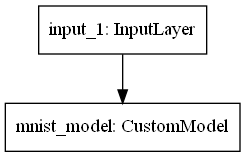

In [88]:
tf.keras.backend.clear_session()
class CustomModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(CustomModel, self).__init__(**kwargs)
    self.layer_1 = tf.keras.layers.Flatten()
    self.layer_2 = tf.keras.layers.Dense(256, "relu")
    self.layer_3 = tf.keras.layers.Dense(10, "softmax")

  def call(self, inputs):
    x = self.layer_1(inputs)
    x = self.layer_2(x)
    x = self.layer_3(x)
    return x

model = CustomModel(name='mnist_model')

inp = tf.keras.Input((28,28))
out = model(inp)
keras_model = tf.keras.Model(inputs=inp, outputs=out)
plot_model(keras_model)

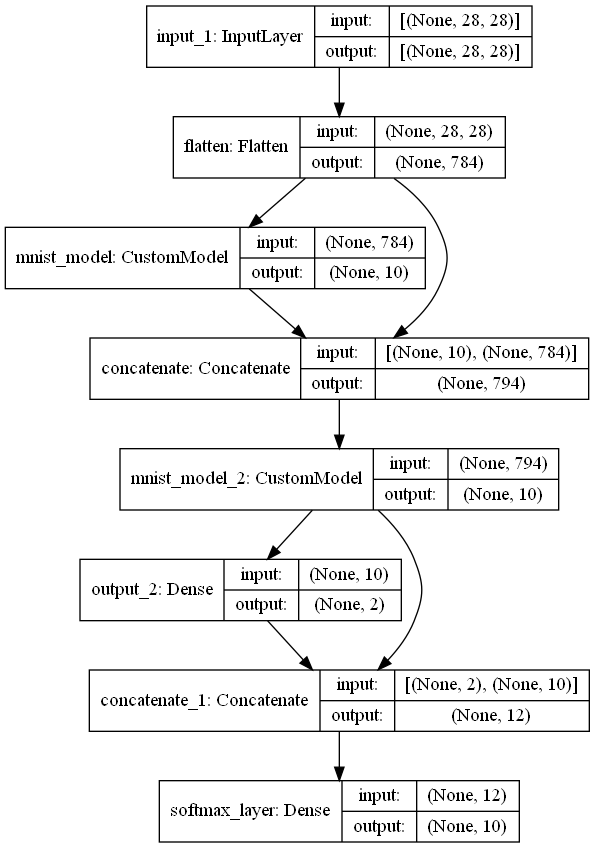

In [30]:
tf.keras.backend.clear_session()
class CustomModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(CustomModel, self).__init__(**kwargs)
    self.layer_2 = tf.keras.layers.Dense(256, "relu")
    self.layer_3 = tf.keras.layers.Dense(10, "softmax")

  def call(self, inputs):
    x = self.layer_2(inputs)
    x = self.layer_3(x)
    return x


inp_1 = tf.keras.Input((28,28))
x1 = tf.keras.layers.Flatten()(inp_1)
x2 = CustomModel(name='mnist_model')(x1)

out1 = tf.keras.layers.Dense(2, name='output_1')(x2)

concatenate = tf.keras.layers.concatenate([x2, x1])
x3 =  CustomModel(name='mnist_model_2')(concatenate)
x4 = tf.keras.layers.Dense(2, name='output_2')(x3)
x5 = tf.keras.layers.concatenate([x4, x3])
out = tf.keras.layers.Dense(10, activation='softmax', name='softmax_layer')(x5)

keras_model = tf.keras.Model(inputs=[inp_1], outputs=[out])
plot_model(keras_model, show_shapes=True)

In [36]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=64, validation_data=(x_val, y_val))
result = model.evaluate(x_val, y_val)

Epoch 1/4
938/938 [==============================] - 11s 11ms/step - loss: 0.4001 - accuracy: 0.8607 - val_loss: 0.4470 - val_accuracy: 0.8421
Epoch 2/4
938/938 [==============================] - 9s 10ms/step - loss: 0.3820 - accuracy: 0.8626 - val_loss: 0.4486 - val_accuracy: 0.8480
Epoch 3/4
938/938 [==============================] - 9s 10ms/step - loss: 0.3882 - accuracy: 0.8632 - val_loss: 0.4356 - val_accuracy: 0.8443
Epoch 4/4
313/313 [==============================] - 1s 5ms/step - loss: 0.4514 - accuracy: 0.8391


In [37]:
# model.compile(
#     optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
#     # Loss function to minimize
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#     # List of metrics to monitor
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
# )

In [39]:
# print("Fit model on training data")
# history = model.fit(
#     x_train,
#     y_train,
#     batch_size=64,
#     epochs=10,
#     # We pass some validation for
#     # monitoring validation loss and metrics
#     # at the end of each epoch
#     validation_data=(x_val, y_val),
# )